In [1]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
import jieba
import jieba.analyse
import urllib.request
import matplotlib.pyplot as plt
import math

analyse use on tags

urllib use on url

In [24]:
i=1
#url = 'https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt'
f = open("topic.txt",'r',encoding="utf-8")

In [25]:
def get_tokens(text):
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
    no_punctuation = lowers.translate(remove_punctuation_map)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens
def is_chinese(uchar):
    if uchar >= u'\u4e00' and uchar <= u'\u9fa5':
        return True
    else:
        return False

def format_str(content):
    content_str = ''
    for i in content:
        if is_chinese(i):
            content_str = content_str + ｉ
    return content_str

In [26]:
def tf(line_fre,line_word_num):
    return line_fre/line_word_num
def idf(m,fre):
    return math.log(m/fre)
def tf_idf(a,b):
    return a*b

In [27]:
m = 1#行數
l= 0
line_num_list = []#每行詞數
fre = {}#全部文章單詞頻率
word_fre = []
word_fre_show = []
word_no = []#字詞編號
word_no_show = []
tfscore = []
tfname = []
idfscore = []
tf_idfscore = []
tf_idfscore_show = []

In [28]:
#topic = urllib.request.urlopen(url)
for line in f.readlines():
    line_word_num = 0#一行詞數
    line_fre = {}#一行全字詞頻
    convert = format_str(line)
    words = jieba.cut(convert, cut_all=False)
    for word in words:
        line_word_num = line_word_num + 1
        #print (word)
        line_fre[word]=line_fre.get(word,0)+1
        fre[word]=fre.get(word,0)+1
    line_items=list(line_fre.items())
    line_num_list.append(line_word_num)
    k=0
    while True:
        try:
            line_word,line_count=line_items[k]#line_count一行某單詞數
            tfname.append(line_word)
            tfscore.append(tf(line_count, line_word_num))
            k=k+1
        except:
            break;
    items=list(fre.items())
    m = m +1
items.sort(key=lambda x:x[1],reverse=True)
g=0
print("topic cut done!")
while True:
    try:
        n=0
        word,count=items[g]#count某單詞總數
        word_fre.append(count)
        idfscore.append(idf(m,count))
        #print("{0:0}  {1:<1}:{2:>2}".format(g,word,count))
        while True:
            try:
                if word == tfname[n]:
                    tf_idfscore.append(tf_idf(tfscore[n],idfscore[g]))
                n = n+1
            except:
                break
        word_no.append(g)
        g = g+1
    except:
        break
print("TF_IDF compute done!")
tf_idfscore.sort(reverse = True)
for i in range(100):
    tf_idfscore_show.append(tf_idfscore[i])
    word_no_show.append(word_no[i])
    word_fre_show.append(word_fre[i])
f.close()
print("txt close")

topic cut done!
TF_IDF compute done!
txt close


In [29]:
def draw1(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.xlabel('Weight')
    plt.title('occur frequence draw') # 設定圖表標題
    plt.show()

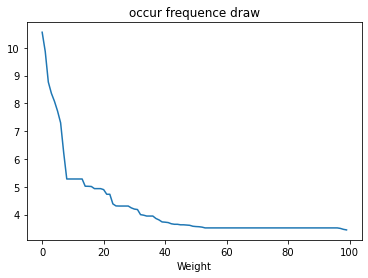

In [30]:
draw1(word_no_show, tf_idfscore_show)

In [31]:
def draw2(word_no_show, word_fre_show):
    word_fre_show.sort(reverse=True)
    plt.plot(word_no_show, word_fre_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.xlabel('Weight')
    plt.title('occur frequence draw') # 設定圖表標題
    plt.show()

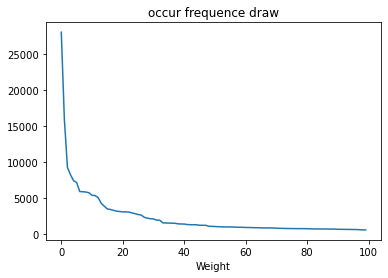

In [32]:
draw2(word_no_show, word_fre_show)